**Milestone 1: Data Preparation Report**

*Introduction*

The goal of this project is to build a system that can recommend songs that sound similar to a track a user is listening to. Instead of suggesting music based on artist, playlist labels, or broad genre categories, the focus here is on the sound qualities inside the audio itself. When people say two songs have the same vibe, they usually mean they share traits like tempo, loudness, energy, rhythm, or how bright or dark the music feels. This project aims to capture that idea in a structured way that a computer can use.

The inspiration behind this project project came from not being satisfied with how music apps recommend songs. Most streaming services compare your listening history to large groups of other users and suggest music that people with similar tastes enjoy. They also analyze sound features like tempo, loudness, and mood, but the results often miss the finer feeling of how two songs truly match. I still find myself manually building playlists to get songs that share a specific vibe or memory, like summer 2017. This made me want to create a system that focuses more directly on the actual sound features of the music, instead of relying mostly on broad listening patterns or genre labels.

For this project, I reviewed several music datasets from Kaggle and settled on a large Spotify tracks dataset that includes around 170,000 songs from 1921 to 2020. It does not come with genre labels in the CSV, but it does include rich audio features such as tempo, loudness, energy, acousticness, danceability, valence, and speechiness, along with metadata like year, popularity, and explicitness. This makes it a good fit for learning patterns in how songs sound and how they perform, and it leaves room to add better genre or style information later using the Spotify API during feature engineering.

In [ ]:
# We are going to need this to contact the Spotify API
%pip install spotipy

*Data Structure and Descriptive Statistics*

In [ ]:
from IPython.display import display

# Link to the CSV File we are using
url = "https://drive.google.com/uc?id=1HcGhJ3zu00u5gfvfPwGOI3GULshsgdAL"
df = pd.read_csv(url, low_memory=False)

# Analyzing the features of the data
print("Shape: (rows, cols):", df.shape)
print("Total rows:", len(df))
print("Column names:", list(df.columns))

# first 10 rows
print("\nFirst 10 rows:")
display(df.head(10))



Shape: (rows, cols): (170653, 19)
Total rows: 170653
Column names: ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo']

First 10 rows:


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


nEXT, I will determine which values are categorial or continuous. To do that, I will need to know the number of unique values in the dataset.

In [ ]:
# Viewing the nature ofthe variables

df_unique_values = (
    pd.concat(
        [
            df.nunique(dropna=True).rename("Number of unique values"),
            df.dtypes.astype(str).rename("Data type")
        ],
        axis=1
    )
    .reset_index()
    .rename(columns={"index": "Column Name"})
)

display(df_unique_values)

,Column Name,Number of unique values,Data type
0,valence,1733,float64
1,year,100,int64
2,acousticness,4689,float64
3,artists,34088,object
4,danceability,1240,float64
5,duration_ms,51755,int64
6,energy,2332,float64
7,explicit,2,int64
8,id,170653,object
9,instrumentalness,5401,float64


In [ ]:
rows = [
    ("valence", "continuous"),
    ("year", "categorical"),
    ("acousticness", "continuous"),
    ("artists", "categorical"),
    ("danceability", "continuous"),
    ("duration_ms", "continuous"),
    ("energy", "continuous"),
    ("explicit", "categorical"),
    ("id", "categorical"),
    ("instrumentalness", "continuous"),
    ("key", "categorical"),
    ("liveness", "continuous"),
    ("loudness", "continuous"),
    ("mode", "categorical"),
    ("name", "categorical"),
    ("popularity", "continuous"),
    ("release_date", "categorical"),
    ("speechiness", "continuous"),
    ("tempo", "continuous"),
]

df_types = pd.DataFrame(rows, columns=["Column Name", "Type"])
display(df_types)

,Column Name,Type
0,valence,continuous
1,year,categorical
2,acousticness,continuous
3,artists,categorical
4,danceability,continuous
5,duration_ms,continuous
6,energy,continuous
7,explicit,categorical
8,id,categorical
9,instrumentalness,continuous


*Univariate Analysis*

,Column Name,count,n_missing,mean,median,std,min,q1,q3,max
0,acousticness,170653,0,0.502115,0.516000,0.376032,0.0,0.1020,0.8930,0.996
1,danceability,170653,0,0.537396,0.548000,0.176138,0.0,0.4150,0.6680,0.988
2,duration_ms,170653,0,230948.310666,207467.000000,126118.414668,5108.0,169827.0000,262400.0000,5403500.000
3,energy,170653,0,0.482389,0.471000,0.267646,0.0,0.2550,0.7030,1.000
4,instrumentalness,170653,0,0.167010,0.000216,0.313475,0.0,0.0000,0.1020,1.000
5,liveness,170653,0,0.205839,0.136000,0.174805,0.0,0.0988,0.2610,1.000
6,loudness,170653,0,-11.467990,-10.580000,5.697943,-60.0,-14.6150,-7.1830,3.855
7,popularity,170653,0,31.431794,33.000000,21.826615,0.0,11.0000,48.0000,100.000
8,speechiness,170653,0,0.098393,0.045000,0.162740,0.0,0.0349,0.0756,0.970
9,tempo,170653,0,116.861590,114.729000,30.708533,0.0,93.4210,135.5370,243.507


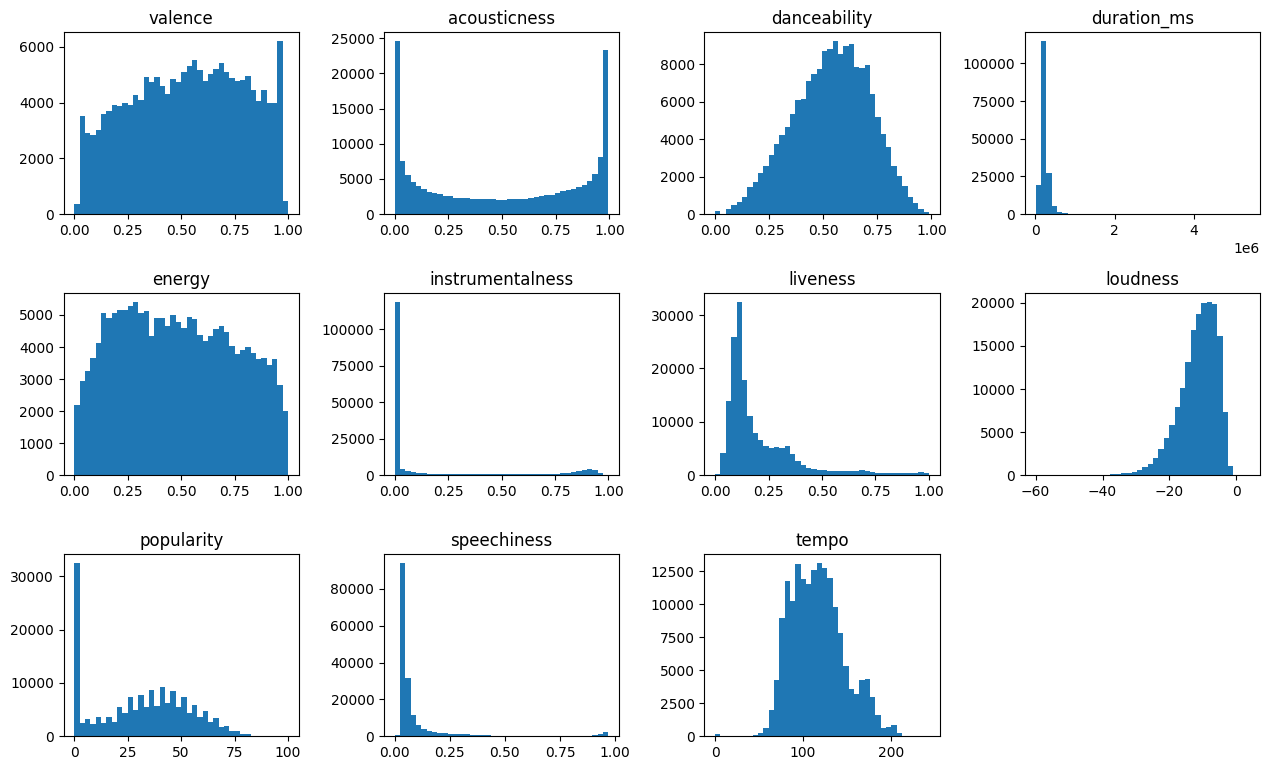

In [ ]:
# Creating a summary table of the continuous Values
summary_cols = [
    "Column Name", "count", "n_missing",
    "mean", "median", "std",
    "min", "q1", "q3", "max"
]

# Putting continuous values in a table, so that I can reuse it later
continuous_values = df_types.loc[df_types["Type"] == "continuous", "Column Name"].tolist()
df_continuous_values_summary = pd.DataFrame(columns=summary_cols)


summary_rows = []
for col in continuous_values:
    # skip if missing or not numeric
    if col not in df.columns or not pd.api.types.is_numeric_dtype(df[col]):
        continue

    s = df[col]
    s_nonnull = s.dropna()
    q1 = s_nonnull.quantile(0.25)
    q3 = s_nonnull.quantile(0.75)

    summary_rows.append({
        "Column Name": col,
        "count": int(s_nonnull.shape[0]),
        "n_missing": int(s.shape[0] - s_nonnull.shape[0]),
        "mean": s_nonnull.mean(),
        "median": s_nonnull.median(),
        "std": s_nonnull.std(ddof=1),
        "min": s_nonnull.min(),
        "q1": q1,
        "q3": q3,
        "max": s_nonnull.max(),
    })

df_continuous_values_summary = (
    pd.DataFrame(summary_rows)
      .sort_values("Column Name")
      .reset_index(drop=True)
)
display(df_continuous_values_summary)

# Summary histograms
import math

# Keeping only numeric columns that exist
cont_numeric = [c for c in continuous_values
                if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

n = len(cont_numeric)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 2.6))
axes = axes.flatten()

for i, col in enumerate(cont_numeric):
    df[col].plot(kind="hist", bins=40, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Removing any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()




In [ ]:
# Conducting a sanity check to see if my dataset has any dulicate values I should take care of.
dup_full = int(df.duplicated().sum())
print(f"Duplicate full rows: {dup_full}")

# Duplicate IDs
if "id" in df.columns:
    dup_id_count = int(df.duplicated(subset=["id"]).sum())
    print(f"Duplicate rows on id: {dup_id_count}")
    if dup_id_count > 0:
        dup_id_preview = (
            df[df.duplicated(subset=["id"], keep=False)]
            [["id", "artists", "name"]]
            .sort_values("id")
            .head(20)
        )
        display(dup_id_preview)

Duplicate full rows: 0
Duplicate rows on id: 0


All the continuous features in this table have a count of 170,653 and n_missing of 0. That tells me this part of the dataset is complete, so I do not need to worry about missing value imputation here. The next thing I will inspect is how the mean and median compare, to see which features are close to normal and which ones are skewed.

*Instrumentalness:*
* This is the most heavily skewed feature in this dataset. The mean is about 0.167, while the median is almost zero (0.000216).
* Most tracks sit very close to 0, so they have little or no instrumental content.
* Only a small group of tracks has high instrumentalness values, and those few tracks pull the mean up and create a long right tail in the distribution.
* For this one, I will apply a log transformation later to help reduce the skew and make the distribution easier for the model to learn from.

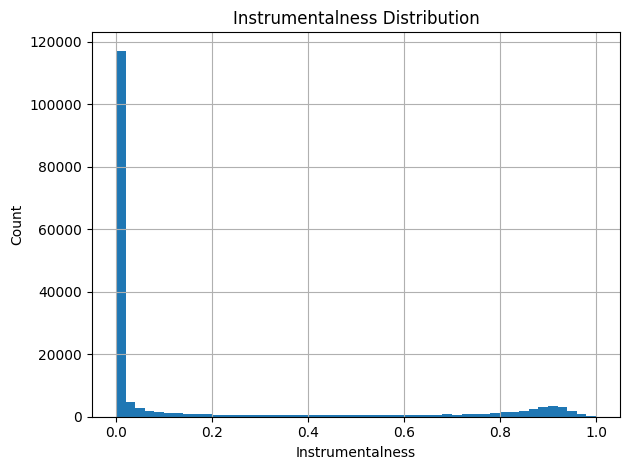

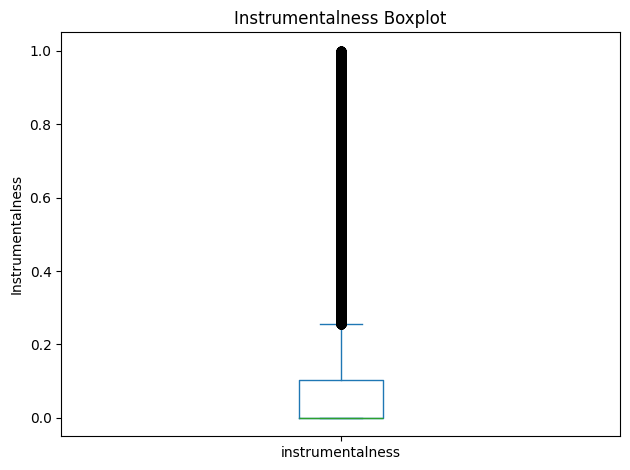

In [ ]:
# Visualizing the skew with a histogram
plt.figure()
df["instrumentalness"].hist(bins=50)
plt.title("Instrumentalness Distribution")
plt.xlabel("Instrumentalness")
plt.ylabel("Count")
plt.tight_layout()

# Investigating outliers with a bixplot
plt.figure()
df["instrumentalness"].plot(kind="box")
plt.title("Instrumentalness Boxplot")
plt.ylabel("Instrumentalness")
plt.tight_layout()

To further understand what these high instrumentalness values actually represent, let me create a table with the tracks with the largest instrumentalness scores and look at them directly. This wil help me confirm whether the model will treating true instrumental tracks, film scores, ambient sounds, or some other edge cases as the extreme values in this feature.


In [ ]:
threshold = 0.8

cols_to_show = [
    "id",
    "artists",
    "name",
    "instrumentalness",
    "acousticness",
    "energy",
    "tempo",
    "duration_ms",
]

df_high_instr = (
    df.loc[df["instrumentalness"] >= threshold, cols_to_show]
      .sort_values("instrumentalness", ascending=False)
      .reset_index(drop=True)
)

display(df_high_instr.head(50))

,id,artists,name,instrumentalness,acousticness,energy,tempo,duration_ms
0,605JTCltCe1IcqrGXQ294K,['Sounds for Life'],Brown Noise for Sleep,1.000,0.975000,0.079200,132.904,4270034
1,5I21rMWLtCjWQl6QyLn85W,"['Erik Eriksson', 'White Noise for Babies', 'W...",Pure Brown Noise - Loopable with no fade,1.000,0.908000,0.001250,0.000,72223
2,0KByxc2bldSo9PtAQQnipz,['High Altitude Samples'],Cabin Back Noise,1.000,0.957000,0.338000,58.227,171719
3,5X8Hut4pmjxDUd8bYfFqjb,['The White Noise Zen & Meditation Sound Lab'],Calm Rain Storm & Gentle White Noise,1.000,0.001190,0.342000,0.000,148000
4,5aVTpbRU7DM9GfCNydb9MR,['Rain Sounds ACE'],Rain in the Park,1.000,0.106000,0.654000,0.000,164452
5,2eWqBNH136U8Et0UTxBacB,['Granular'],White Noise - BP 228 hz,1.000,0.872000,0.000020,0.000,104516
6,2bRKxuH1o7pTmb1y4GfdEc,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",Clean White Noise - Loopable with no fade,1.000,0.791000,0.003420,0.000,90228
7,129ldjjvnFfA7Ygc8ktYnh,['High Altitude Samples'],Soft Brown Noise,1.000,0.394000,0.001480,0.000,160003
8,4MaJMSbaMBW3IrBuvWlOSX,"['Erik Eriksson', 'Lullabies for Deep Meditati...",White Noise - Loopable With No Fade,1.000,0.791000,0.003420,0.000,90228
9,1cDoexqoPljd8ztMW7dLCe,['Relaxation Channel'],Pink Noise (Loopable),1.000,0.000059,0.000020,0.000,60043


*Speechiness:*
* Speechiness is also strongly right skewed in this dataset, as we can see that the mean is about 0.098, while the median is around 0.045.

In [ ]:
speechiness_thresh = df["speechiness"].quantile(0.95)

# Filtering tracks with very high speechiness
cols_to_show = ["id", "artists", "name", "speechiness", "duration_ms", "loudness"]
df_high_speech = (
    df.loc[df["speechiness"] >= speechiness_thresh, cols_to_show]
      .sort_values("speechiness", ascending=False)
      .reset_index(drop=True)
)

display(df_high_speech.head(50))

,id,artists,name,speechiness,duration_ms,loudness
0,47V5oU29gnqQ86ch6EVMNE,['Эрих Мария Ремарк'],Часть 38.4 & Часть 39.1 - Обратный путь,0.970,131834,-20.560
1,21Sy5S0LdUqKBS4IEnuqtt,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 174 - Die drei Ehen der Grand Sophy,0.969,124305,-20.238
2,1EGtefPOPQHT2ZC1FBrpCl,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 220 - Die drei Ehen der Grand Sophy,0.969,116886,-16.797
3,6Ksg60nOqLte96KkCd5OIt,['Эрнест Хемингуэй'],Часть 51.2 - Фиеста,0.969,103600,-14.054
4,2LAPdENXKnvaKUT11qoLAF,"['Ernest Hemingway', 'Christian Brückner']",Kapitel 20 - Der alte Mann und das Meer - Erzä...,0.968,476213,-19.092
5,0z75EpbHgK1Tw3CDnM4Qv3,['Эрнест Хемингуэй'],Часть 152.3 - По ком звонит колокол,0.968,99600,-22.195
6,1GzQI5Oy0lnL0Effd07rxX,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 216 - Die drei Ehen der Grand Sophy,0.968,151028,-19.083
7,2UAgXacpKvUlpTbtTyeD4G,"['Ernest Hemingway', 'Christian Brückner']",Kapitel 5 - Der alte Mann und das Meer - Erzäh...,0.968,510133,-19.298
8,2gXCCEohxBsLdPhGIKev71,['Эрнест Хемингуэй'],Часть 126.4 & Часть 127.1 - По ком звонит колокол,0.968,101130,-19.952
9,1DLWSreriQn9QEZR0w0B79,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 321 - Die drei Ehen der Grand Sophy,0.967,111008,-17.046


many of the tracks with very high speechiness also have much longer durations than normal songs. This suggests that a lot of them are audiobooks, spoken word, or other non musical content. These tracks are not really of much impornance when we look at the goal of this project. So most likely, I will remove them during preprocessing.

*Tempo*
* A minimum tempo of 0 is odd. I want to see if there are other weird tempos in the data. Let’s plot the distribution, then list the rows with the lowest tempos to inspect them.

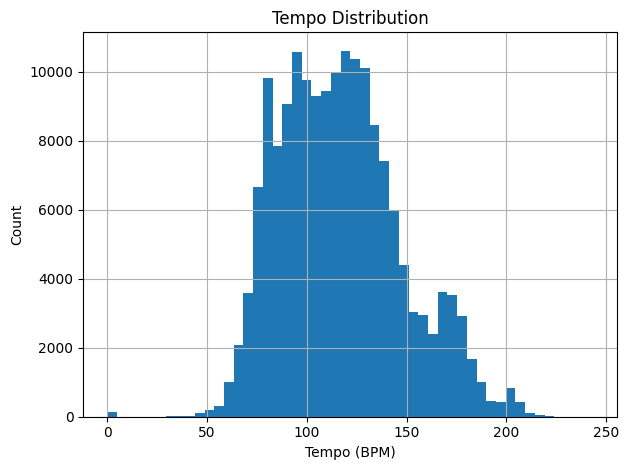

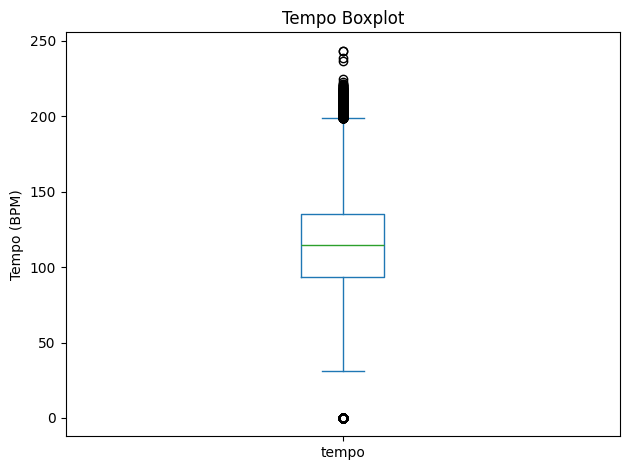

In [ ]:
# Inspecting the Tempo distribution
plt.figure()
df["tempo"].hist(bins=50)
plt.title("Tempo Distribution")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.tight_layout()

# Inspecting for outliers in the tempo data
plt.figure()
df["tempo"].plot(kind="box")
plt.title("Tempo Boxplot")
plt.ylabel("Tempo (BPM)")
plt.tight_layout()



The main tempo shape looks normal, but the zero values stand out as outliers. I’ll inspect the listed rows and verify a few tracks by name online or with the Spotify API. If they are data entry placeholders, I will correct them from the API or drop them before modeling.

In [ ]:
# Extracting only the necessary columns
low_tempo_cols = ["id", "artists", "name", "tempo", "key", "mode", "loudness", "duration_ms"]

df_low_tempos = (
    df.loc[df["tempo"] <= 40, low_tempo_cols]
      .sort_values("tempo")
      .reset_index(drop=True)
)

display(df_low_tempos.head(50))

,id,artists,name,tempo,key,mode,loudness,duration_ms
0,2WTtJDfCUjAyCZHRSfCLDn,['Ignacio Corsini'],La Mina del Ford - Remasterizado,0.0,5,1,-24.894,133947
1,5tQsQaMquCXBREb1FNymi7,['Francisco Canaro'],Oh Mujer Mujer - Remasterizado,0.0,8,0,-15.969,170253
2,29IVdlO7CSlcoOIpOsamkO,['The Moors'],Santa Claus Is Coming To Town,0.0,4,0,-0.671,14629
3,1QXbWUSsLWPtHrbZ7H8o9i,['Orquesta Francisco Canaro'],Tu Y Yo,0.0,6,1,-12.399,211880
4,09eDRV4nzC3eVX7tDEJUNb,['Billie Holiday'],Back In Your Own Backyard - Take 1,0.0,10,1,-13.078,159600
5,7tVDEvPqfx9bu2gIrbWx6z,"['Bert Lahr', 'Judy Garland', 'Ray Bolger', 'B...",If I Were King of the Forest - Partial Take; A...,0.0,10,1,-20.510,44840
6,1ysFtAdl7n8uB6uLCAsUNj,['MGM Studio Orchestra'],Munchkinland Insert - Alternate Tag,0.0,5,0,-19.146,32707
7,0WbcA0RsyG8KntmSCnByR8,['The Slobs'],The Christmas Raid,0.0,1,1,-12.173,10371
8,63kd4m3VFxcJjPVVtbVNAu,['Louis Armstrong'],"Hello, Dolly!",0.0,0,1,-9.935,147000
9,4DGS6afG3cS3Ql1lbOeirB,['Charlie Parker'],"Embraceable You - Live At Carnegie Hall, New Y...",0.0,5,1,-16.371,635067


Looking at the low-tempo tracks, I can see a mix of content. Some are real songs and old recordings that I want to keep, but many are white noise, sleep sounds, rain tracks, or other background audio. Since this project is about music recommendations, these noise tracks will not help the model. Later in preprocessing, I plan to remove rows that are clearly non-music, so that the model focuses on actual songs.


Liveness has a mean of about 0.206 and a median of 0.136, which points to a right skewed distribution, suggesting that more tracks in our dataset are studio recorded vs live recorded.
Since this is an understandable phenomenon, I think this column is fine, it just needs to be standardized later before modeling.

*Loudness*
* The minimum loudness value is -60, which is much lower than most of the data. I want to see the distribution and confirm whether this value is an outlier. I will plot the histogram and boxplot to inspect it.

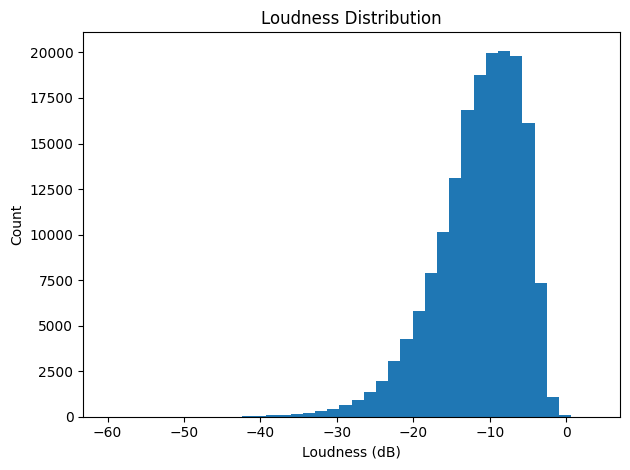

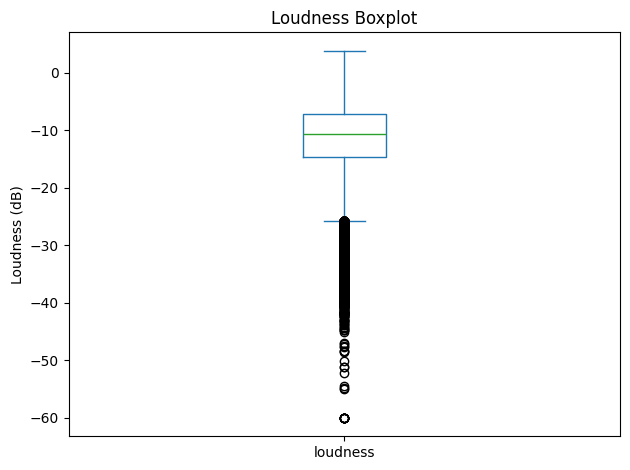

In [ ]:
# Histogram
plt.figure()
df["loudness"].plot(kind="hist", bins=40)
plt.title("Loudness Distribution")
plt.xlabel("Loudness (dB)")
plt.ylabel("Count")
plt.tight_layout()
print("") # Adding Space between the plots

# Boxplot
plt.figure()
df["loudness"].plot(kind="box")
plt.title("Loudness Boxplot")
plt.ylabel("Loudness (dB)")
plt.tight_layout()

In [ ]:
# Inspecting the tracks which are at a low volume
low_volume = df[df["loudness"] < -30][["artists", "name", "loudness", "energy"]].head(25)
display(low_volume)

,artists,name,loudness,energy
32,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Raja Manggala,-37.311,0.00817
48,"['Sergei Rachmaninoff', 'Yuri Temirkanov', 'St...","No. 14, Vocalise",-31.134,0.02570
62,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Tedhak Saking,-32.959,0.01160
77,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Sri Kondur,-30.842,0.01480
112,"['Sergei Rachmaninoff', 'János Starker']",III. Andante,-31.060,0.01350
115,"['Sergei Rachmaninoff', 'János Starker']",III. Andante,-31.060,0.01350
144,"['Sergei Rachmaninoff', 'Yuri Temirkanov', 'St...","No. 14, Vocalise",-31.134,0.02570
212,['Ignacio Corsini'],Recuerdo Criollo - Remasterizado,-30.026,0.10200
978,['Iván Rolón'],"Cuatro melodías al unísono, No. III",-38.295,0.00176
1049,['Francisco Canaro'],Yo Me Mato - Instrumental (Remasterizado),-30.216,0.06770


Looking at this table, I can concluse that a lot of these are vintagerecordings, classical pieces, etc which are generally much quieter. This tells me that these low volumes were not a data entry error. Fr these ones, especially the etreme values, I will treat them as outliers during preprocessing.

**Correlation heatmap for numeric features**

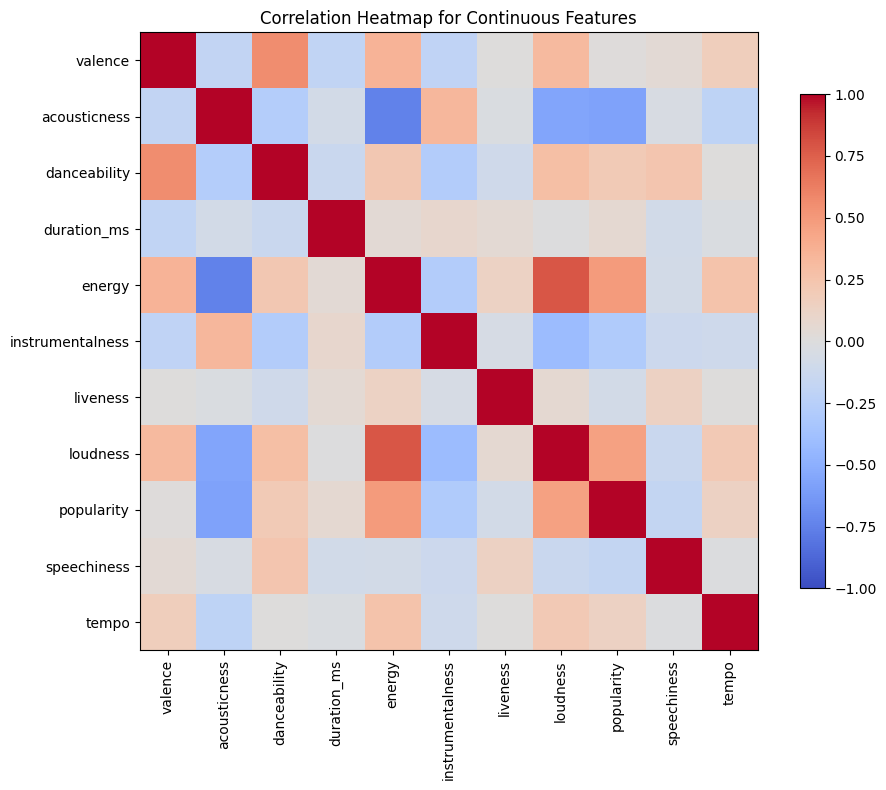

In [ ]:
num_cols = df_types.loc[df_types["Type"] == "continuous", "Column Name"].tolist()

corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, shrink=0.8)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap for Continuous Features")
plt.tight_layout()

* From the correlation matrix, a few patterns stand out.
* Energy and loudness move together, which makes sense, since louder tracks usually feel more intense. Energy and acousticness are strongly opposite, so the more acoustic a track is, the less “high energy” it tends to feel.
* Valence also shows a positive link with danceability, and a negative link with acousticness, which matches the idea that happy, upbeat songs are often more rhythmic and less stripped back.
* Acousticness and loudness are also inversely proportional, so quieter, softer songs tend to be more acoustic. I also notice that highly acoustic tracks are, on average, less popular, which suggests that louder, more produced songs may have an advantage in this dataset.

In [ ]:
# Categorical Values

cat_cols = df_types.loc[df_types["Type"].str.lower() == "categorical", "Column Name"].tolist()

summary_cols = ["Column Name", "count", "n_missing","n_unique", "Mode", "Modal Frequency", "top_pct"]

df_categorical_summary = pd.DataFrame(columns=summary_cols)

for col in cat_cols:
    s = df[col]
    n_total = s.shape[0]
    n_missing = s.isna().sum()
    s_nonnull = s.dropna()

    if s_nonnull.empty:
        top_val = np.nan
        top_freq = 0
        top_pct = np.nan
        n_unique = 0
    else:
        vc = s_nonnull.value_counts(dropna=True)
        top_val = vc.index[0]
        top_freq = int(vc.iloc[0])
        top_pct = top_freq / s_nonnull.shape[0]
        n_unique = int(s_nonnull.nunique(dropna=True))

    df_categorical_summary.loc[len(df_categorical_summary)] = {
        "Column Name": col,
        "count": int(n_total - n_missing),
        "n_missing": int(n_missing),
        "n_unique": n_unique,
        "Mode": top_val,
        "Modal Frequency": top_freq,
        "top_pct": top_pct
    }

display(df_categorical_summary.sort_values("Column Name").reset_index(drop=True))

,Column Name,count,n_missing,n_unique,Mode,Modal Frequency,top_pct
0,artists,170653,0,34088,['Эрнест Хемингуэй'],1211,0.007096
1,explicit,170653,0,2,0,156220,0.915425
2,id,170653,0,170653,7HmnJHfs0BkFzX4x8j0hkl,1,0.000006
3,key,170653,0,12,0,21600,0.126573
4,mode,170653,0,2,1,120635,0.706902
5,name,170653,0,133638,White Christmas,73,0.000428
6,release_date,170653,0,11244,1945,1446,0.008473
7,year,170653,0,100,2018,2103,0.012323


The artists column looks much cleaner in this dataset. It has no missing values and a reasonable number of repeated names, so it can be useful later if I decide to use it. Right now the values are stored as Python list objects, which are awkward for analysis, so I will first convert these list objects into plain strings, so the column is easier to work with and can be encoded properly later.

I am now looking at the distribution of song keys in the dataset. As someone who plays keys and produces music, I know that the choice of key affects how a song feels and how comfortable it is to perform. Some keys fall more easily under the hands than others, and some are easier for singers. So the popularity of certain keys may not be random.

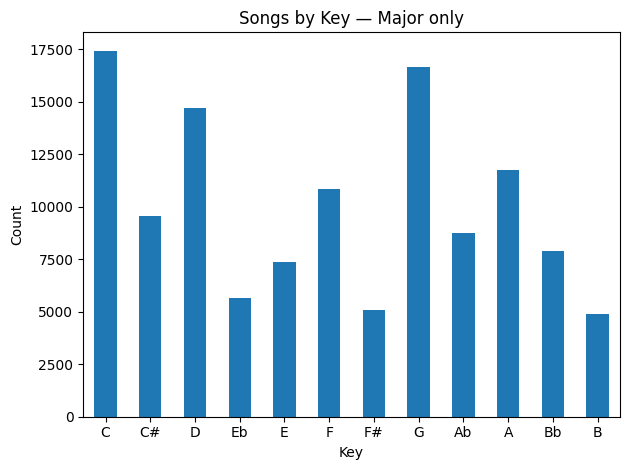

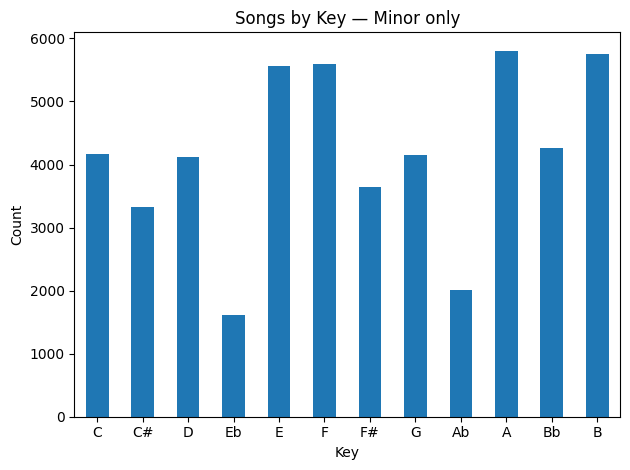

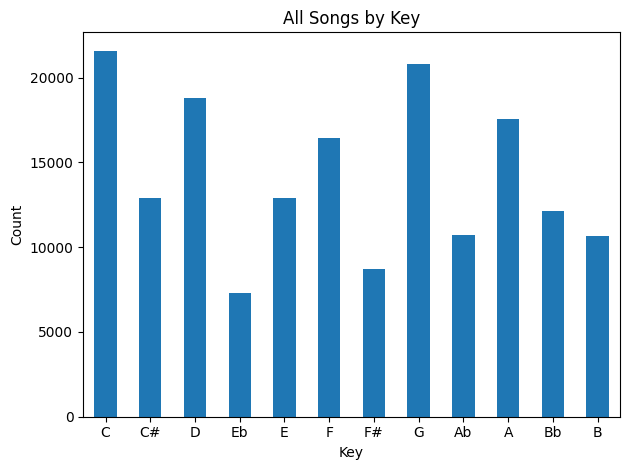

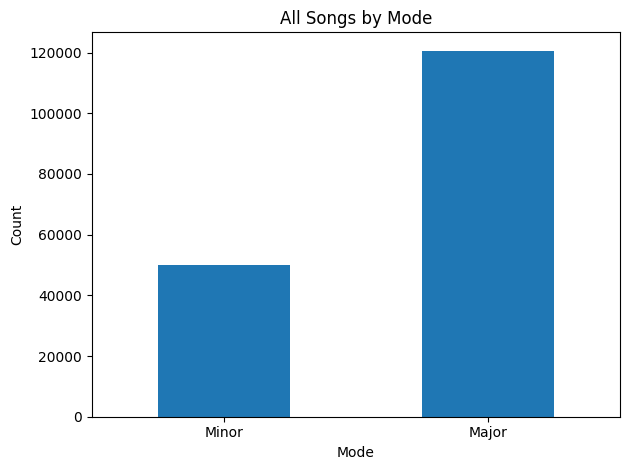

In [ ]:
# Labelling the keys
key_names = {
    0:"C", 1:"C#", 2:"D", 3:"Eb", 4:"E", 5:"F",
    6:"F#", 7:"G", 8:"Ab", 9:"A", 10:"Bb", 11:"B"
}

# Helper to get counts for keys in order
def key_counts(series):
    idx = pd.Index(range(12), name="key")
    return series.value_counts().reindex(idx, fill_value=0)

# Songs by key (major only)
major_keys = key_counts(df.loc[df["mode"] == 1, "key"])
plt.figure()
major_keys.rename(index=key_names).plot(kind="bar")
plt.title("Songs by Key — Major only")
plt.xlabel("Key")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

# Songs by key (minor only)
minor_keys = key_counts(df.loc[df["mode"] == 0, "key"])
plt.figure()
minor_keys.rename(index=key_names).plot(kind="bar")
plt.title("Songs by Key — Minor only")
plt.xlabel("Key")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

# all songs by key
all_keys = key_counts(df["key"])
plt.figure()
all_keys.rename(index=key_names).plot(kind="bar")
plt.title("All Songs by Key")
plt.xlabel("Key")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

# All songs by mode
mode_counts = df["mode"].value_counts().sort_index()  # 0 then 1
mode_labels = mode_counts.index.map({0:"Minor", 1:"Major"})
plt.figure()
pd.Series(mode_counts.values, index=mode_labels).plot(kind="bar")
plt.title("All Songs by Mode")
plt.xlabel("Mode")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

The key distribution shows that C, D, and G major appear most often, with A minor and B minor also very common. This lines up with practical music use, since these keys are friendly on both piano and guitar and fit well for many vocal ranges. A minor is the relative minor of C major, so it naturally shows up a lot when songs are written around simple white note patterns. Most tracks in the dataset are in major keys, which matches the general trend in Western popular music toward brighter, more consonant harmony.

Eb major and Eb minor appear much less. That makes sense, because Eb major is less comfortable for many players than keys like C, G, or D, and Eb minor uses a lot of sharps or flats, which can be awkward to read and write. Even though keys like F# / Gb or Eb minor can feel fine under the fingers for some patterns, they are less common choices for mainstream songs, so they naturally show up less in this dataset.

**Bivariate Analysis**

I want to see whether explicit tracks are more popular on average. The question to be asked here is: Do I really have to be explicit to make a hit, or can clean songs do just as well?

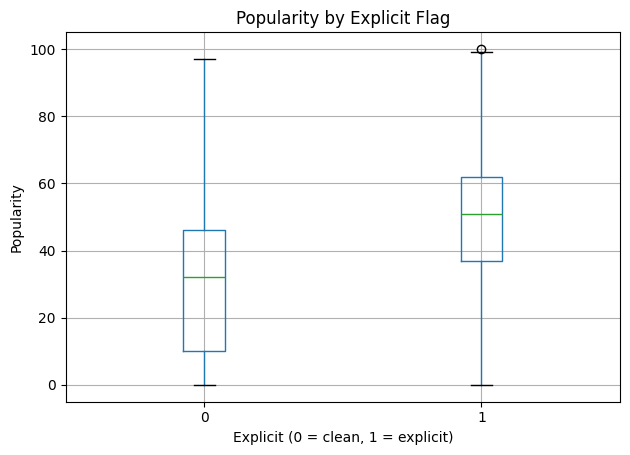

In [ ]:
df.boxplot(column="popularity", by="explicit")
plt.title("Popularity by Explicit Flag")
plt.suptitle("")
plt.xlabel("Explicit (0 = clean, 1 = explicit)")
plt.ylabel("Popularity")
plt.tight_layout()

* From this, we can see that explicit songs tend to have higher median popularity and higher typical popularity ranges than clean songs in this dataset, but there is strong overlap between the two groups.
* This tells me that a track being explicit does not gurantee its popularity, but only increases its chances of being popular.
* It also tells me that clean tracks do not necesarily have to be counted out of the popularity race, even though it will be a bit harder for them to get popular.
* I will explore some popular clean songs to try to find a pattern

In [ ]:
clean = df[df["explicit"] == 0]

high_cut = clean["popularity"].quantile(0.9)

# Sampling 5 popular clean tracks
popular_clean = (
    clean[clean["popularity"] >= high_cut]
    .sample(n=5, random_state=42)
    [["id", "artists", "name", "popularity", "danceability", "energy", "valence"]]
)

display(popular_clean)

,id,artists,name,popularity,danceability,energy,valence
19051,7iDa6hUg2VgEL1o1HjmfBn,"['Bebe Rexha', 'Florida Georgia Line']",Meant to Be (feat. Florida Georgia Line),78,0.643,0.783,0.579
90800,12v5GBM74fB8WsHJPQRTIe,"['Hiatus Kaiyote', 'Q-Tip']",Nakamarra (feat. Q-Tip) (feat. Q-Tip),58,0.552,0.531,0.324
11816,3koCCeSaVUyrRo3N2gHrd8,"['Earth, Wind & Fire']",Let's Groove,74,0.869,0.648,0.900
38303,6KgBpzTuTRPebChN0VTyzV,['Lizzo'],Good as Hell,74,0.682,0.919,0.535
56036,70XP39KE8vTgxtRXcwfxJA,['Justin Bieber'],All That Matters,58,0.696,0.513,0.144


* Looking at these popular clean tracks, one thing stands out right away. The artists were already popular. Justin Beiber and Bebe Rexha are always on the charts, so it makes sense that the songs are popular too.
* Valence is interesting here. Let’s Groove and Good As Hell both have high valence, which fits their upbeat, feel good sound. All That Matters has much lower valence, which lines up with it being more moody and emotional. This tells me that you can still have a hit even when the song leans sad or serious, as long as the artist has enough reach and the track connects with listeners.

Correlation between danceability and energy: 0.222




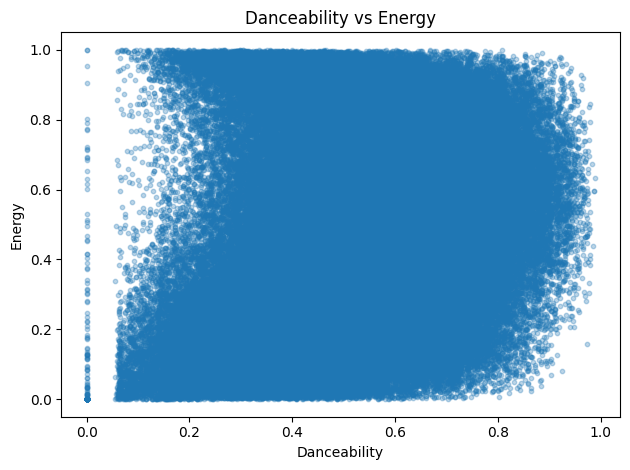

In [ ]:
plt.figure()
plt.scatter(
    df["danceability"],
    df["energy"],
    alpha=0.3,
    s=10
)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability vs Energy")
plt.tight_layout()

# Correlation value for a numeric summary
corr_de = df["danceability"].corr(df["energy"])
print(f"Correlation between danceability and energy: {corr_de:.3f}\n\n")

The scatter plot was surprising. I expected danceability and energy to rise together in a clear line, but that is not what the data shows. There is a weak positive trend overall, but a lot of tracks break the pattern. Some songs sit at very high energy with almost zero danceability. These are likely tracks that feel intense or loud, but not something you would actually move to, for example fast orchestral pieces, noise tracks, or very chaotic rock. But to be certain, I will sample some tracks just to be sure.

In [ ]:
high_energy_low_dance = df.loc[
    (df["energy"] > 0.9) & (df["danceability"] < 0.1),
    ["id", "artists", "name", "danceability", "energy"]
]

high_energy_low_dance_sample = high_energy_low_dance.sample(5, random_state=42)
display(high_energy_low_dance_sample)

,id,artists,name,danceability,energy
149140,20YktmND3vBWQLC83PXBrL,['Dinosaur Jr.'],Lose,0.0922,0.980
74651,4eHq5gcF7S78ouJxR12mGc,['Rain Sounds For Sleep'],Sleep Well Rain Sound,0.0716,0.948
133279,2qsGZEyh1u5tOyiX9WYaIW,['Judas Priest'],Electric Eye - Live from the San Antonio Civic...,0.0777,0.953
117325,5CI3LHXRHtJ99kfbNlDo5G,['Bad Religion'],Pity,0.0994,0.970
76983,6v3KNFdsHbKWx98toitVh9,['Local Oafs'],Do You Want/Need Action,0.0863,0.992


Looking at these, we ca see tracks like Lose , Electric Eye, and Pity are loud, fast rock or metal. They feel intense, but the rhythm is dense and aggressive rather than groovy, so Spotify’s model gives them high energy but low danceability. On the other hand, “Sleep Well Rain Sound” is basically white noise. So this confirms my suspicion.

There is also a clear jump in the danceability axis. Values sit exactly at 0, then the next cluster starts around 0.05. That suggests Spotify treats 0 as a special case for music where the model cannot find a stable groove at all, such as white noise, speech, or film cues, while anything with a usable beat gets a score above that range.

From this plot, I can conclude that that energy and danceability are related but not the same thing. High energy does not guarantee that a track is danceable, and some mid energy songs still land high on danceability. This tells me  that danceability and energy are features with their own charachteristics and it would be wise to keep both features for the model.

I want to see how popularity changes over time. I expect newer songs to be more popular on average, not because they are better, but because they are more recent and show up more in current playlists. So this plot is more about dataset bias than about song quality.

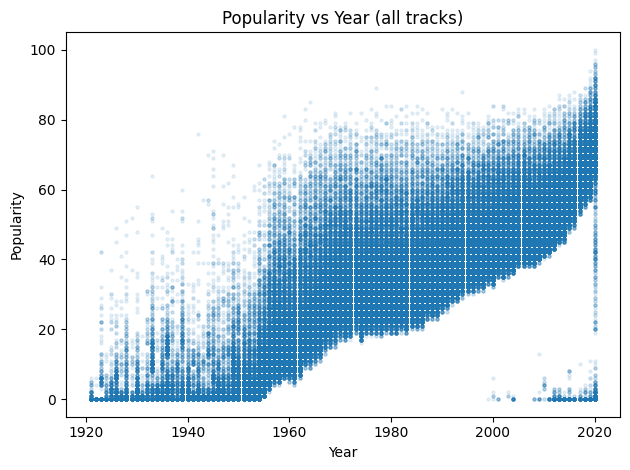

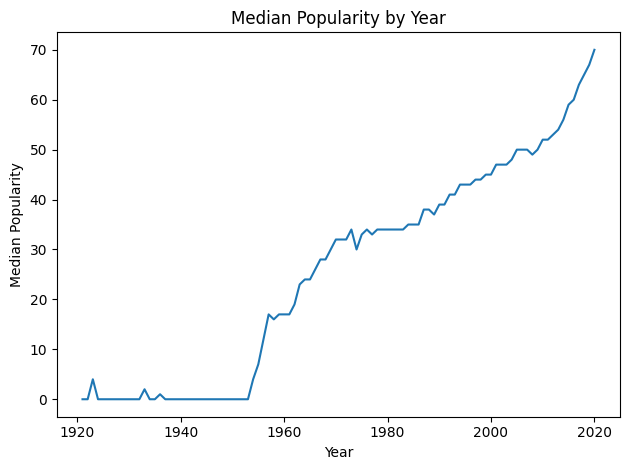

In [ ]:
# Popularity vs year
plt.figure()
plt.scatter(df["year"], df["popularity"], alpha=0.1, s=5)
plt.title("Popularity vs Year (all tracks)")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.tight_layout()

# Median popularity per year, to see the trend more clearly
year_pop = (
    df.groupby("year")["popularity"]
      .median()
      .reset_index()
)

plt.figure()
plt.plot(year_pop["year"], year_pop["popularity"])
plt.title("Median Popularity by Year")
plt.xlabel("Year")
plt.ylabel("Median Popularity")
plt.tight_layout()

The overall shape is pretty much what I expected. Older tracks, especially before the 1950s, mostly sit at low popularity, and the median line stays close to zero for a long time. Which serves as a case for recency bias.

There is a dip around the mid-1970s, another around the early 1990s, and one more around the early 2010s. Each of these lines up with a transition era in how people listen to and release music. In the 1970s and 1980s, vinyl, cassettes, and radio were the main ways to hear songs, and only part of that catalog is now mirrored into modern digital libraries. In the 1990s and early 2000s, CDs and later MP3 downloads took over, then in the 2010s streaming platforms like Spotify became the default way to listen, with streaming revenue overtaking downloads and physical sales around the mid-2010s. As the industry moved from one format to another, older material was not always carried forward in the same way, so those transition periods can show up as dips or shifts in a dataset that is built from current digital catalogs.

The sharp rise in median popularity for recent years makes sense in that context. Newer songs in this dataset are mostly drawn from the streaming era, where playlists, algorithms, and editorial curation push a smaller set of tracks to very high play counts. Older tracks that made it into the catalog are a mix of true classics and deep cuts, so their average popularity is lower and more scattered. So the pattern I see here is less “music suddenly got more popular” and more “this dataset over-represents modern streaming hits and under-represents older tracks that were never pushed into the current platforms at the same

**Data Cleaning**

* During my EDA, I noticed some anomalities with the data. in this data cleanng phase, I am going to apply various technques suitable to crrect each flaw. I will handle any missing values if they show up, standardize data types, and treat outliers that could skew the results.
* For this project, it’s important that the date and year fields are consistent and in the right format, so first I’ll parse release_date into a proper date, check it against year as a sanity check, and confirm they agree before moving on.

In [ ]:
df["release_date_dt"] = pd.to_datetime(df["release_date"], errors="coerce")

bad_mask = df["release_date_dt"].isna()

print("Unparseable dates:", bad_mask.sum())

cols = ["id", "artists", "name", "release_date", "release_date_dt", "year"]
display(df.loc[bad_mask, cols].head(50))

Unparseable dates: 119798


,id,artists,name,release_date,release_date_dt,year
8,05xDjWH9ub67nJJk82yfGf,['Ignacio Corsini'],La Mañanita - Remasterizado,1921-03-20,NaT,1921
11,0F30WM8qRpO8kdolepZqdM,['Ignacio Corsini'],Por Que Me Dejaste - Remasterizado,1921-03-20,NaT,1921
14,0MJZ4hh60zwsYleWWxT5yW,['Zay Gatsby'],Power Is Power,1921-03-27,NaT,1921
18,0QQmUf4aPFaN9U2yRko595,['THE GUY'],When We Die,1921-09-11,NaT,1921
22,0SK1upzAP6NvIgF0uGh6z2,['Ignacio Corsini'],Flor Marchita - Remasterizado,1921-03-20,NaT,1921
23,0UqiUmGDlhL0A0pmLxafn4,['Hanende İbrahim Efendi'],İmtidadı Aşkıma,1921-12-18,NaT,1921
29,0sIGoVO1yuIfpikLaKqqVY,['Ignacio Corsini'],Por Ella - Remasterizado,1921-03-20,NaT,1921
30,0y3F8OUDFuB5bpWpXnQi7n,['Ignacio Corsini'],A Mi Palomita - Remasterizado,1921-03-20,NaT,1921
31,0yKcdafy64xX9n1ant34Ry,['Ignacio Corsini'],Amurado Me Dejaste - Remasterizado,1921-03-20,NaT,1921
40,1T2NGVgAoXjQPEjxTGFRZV,['THE GUY'],Love for Guns,1921-09-11,NaT,1921


The dataset included both a text based release date column and a separate year column. I first converted the release date strings into a datetime field and flagged the rows that failed. I then tried to fix those bad rows by converting them again, including an approach that pulled updated values from the Spotify API, but both attempts were either unsuccessful or far too slow to be practical for this project.

As a result, I have decided to treat the year column as the reliable source. For any track where the release date conversion failed but the year is present, I will create an approximate date using the first day of that year. This keeps full dates where they are valid and still gives the remaining tracks a usable year level timestamp. If i find any rows that still can not be fixed after this step, I will leave them as missing and will treat them as having an unknown release date in the analysis.

In [ ]:
mask = df["release_date_dt"].isna() & df["year"].notna()

df.loc[mask, "release_date_dt"] = pd.to_datetime(
    df.loc[mask, "year"].astype(int).astype(str) + "-01-01",
    errors="coerce"
)

# Checking to see if any more rows failed.
print("Failed Rows:", df["release_date_dt"].isna().sum())

Failed Rows: 0


So all our rows have a valid time and date signature, we will keep that.

I noticed the artists column is stored as a Python list. This will create problems for us when we are at the grouping and encoding stage. For this step, I will convert every value to a clean comma separated string.

In [ ]:
import ast

def normalize_artists(value):
    if isinstance(value, list):
        return ", ".join(map(str, value))
    if isinstance(value, str):
        s = value.strip()
        if s.startswith("[") and s.endswith("]"):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    return ", ".join(map(str, parsed))
            except Exception:
                pass
        return s
    return str(value)

df["artists"] = df["artists"].apply(normalize_artists)

# Sanity check to see if the conversion worked
display(df[["artists"]].head(10))

,artists
0,"Sergei Rachmaninoff, James Levine, Berliner Ph..."
1,Dennis Day
2,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3,Frank Parker
4,Phil Regan
5,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
6,John McCormack
7,Sergei Rachmaninoff
8,Ignacio Corsini
9,Fortugé


The "explicit" column contains a yes/no flag in the source data. Since Models and plots work best with numeric inputs, and there are only two states here, using 0 for clean and 1 for explicit is the simplest way to encode it.

In [ ]:
tmp = pd.to_numeric(df["explicit"], errors="coerce")

# Fallback for missing values.
df["explicit"] = tmp.fillna(0).clip(0, 1).astype("int8")

# Validating the values
print(sorted(df["explicit"].unique().tolist()))

[0, 1]


Key, just like the explicit column should be represented as an int from 0 to 11. To ensure that this is the case. I will coerce anything that looks is not a number to a number in the 0 - 11 range.

In [ ]:
df["key"] = pd.to_numeric(df["key"], errors="coerce")
assert df["key"].between(0, 11).all(), "key must be in 0..11 with no NaNs"
df["key"] = df["key"].astype("int8").astype("category")

Using the same idea for the mode, we will run this just to make sure mode is good.

In [ ]:
df["mode"] = pd.to_numeric(df["mode"], errors="coerce")
assert df["mode"].isin([0, 1]).all(), "mode must be 0 or 1 with no NaNs"
df["mode"] = df["mode"].astype("int8").astype("category")

**Dealing with Outliers**

I will start by dropping rows that look like noise loops or speech, as those are the most obvious to weed out. This is mainly because these represent podcasts, and such will not be imporntant for our model.
Another easy weed to remove is songs whereby tempo == 0, very slow tracks that also have no groove or very high speech, titles or artists that mention things like white noise, rain, sleep, waves, or audiobook words like chapter or kapitel. This way, I am (literally) getting rid of the white noise.

In [ ]:
# Eliminating white noise and speechy audios
noise_terms = r"(white noise|brown noise|pink noise|rain|sleep|fan|waves|ocean|meditation|thunder|spa|ambient|nature|waterfall|fireplace|soundtrack|score|sfx|sound effect)"
speech_terms = r"(chapter|kapitel|часть|cap[ií]tulo|parte|audiobook)"

mask_non_music = (
    (df["tempo"] == 0) |
    ((df["tempo"] <= 40) & ((df["danceability"] == 0) | (df["speechiness"] >= 0.90))) |
    df["name"].str.contains(noise_terms, case=False, na=False) |
    df["artists"].str.contains(noise_terms, case=False, na=False) |
    (
        (df["speechiness"] >= 0.92) &
        (df["duration_ms"] >= 180_000)
    ) |
    df["name"].str.contains(speech_terms, case=False, na=False)
)

# Keeping track of the changes we have made in our data
rows_before = len(df)
df1 = df.loc[~mask_non_music].copy()
dropped_non_music = rows_before - len(df1)

/tmp/ipython-input-1699862717.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["name"].str.contains(noise_terms, case=False, na=False) |
/tmp/ipython-input-1699862717.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["artists"].str.contains(noise_terms, case=False, na=False) |
/tmp/ipython-input-1699862717.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["name"].str.contains(speech_terms, case=False, na=False)


During EDA, we noticed that the columns like duration_ms, loudness, speechiness, liveness, instrumentalness did have some extreme values. So what I will do, I will cap extreme values at the 0.5% and 99.5% quantiles for these columns so that xtremes do not dominate the scale. So now that we have dealt with the obvious non music values in the previous cell,I think these extreme values are the second easiest values to tame.

In [ ]:
cap_cols = ["duration_ms", "loudness", "speechiness", "liveness", "instrumentalness"]
bounds = {}
for c in cap_cols:
    if c in df1.columns and pd.api.types.is_numeric_dtype(df1[c]):
        lo, hi = df1[c].quantile([0.005, 0.995]).tolist()
        bounds[c] = (lo, hi)
        df1[c] = df1[c].clip(lo, hi)

**Dealing with Skewness**

Since all the non music rows have now been dropped, and extreme tails have ebeen trimmed, the next step is to fix skew on a few features so models see smoother shapes. I will keep the raw columns and add simple transforms. I will also add a instrumentalness_zero flag to mark the spike at 0.

Rows before: 170,653
Dropped non-music: 9,360
Rows after: 161,293
Caps used (0.5% / 99.5%):
  duration_ms: [4.659e+04, 8.113e+05]
  loudness: [-31.49, -2.336]
  speechiness: [0.0248, 0.6485]
  liveness: [0.0332, 0.963]
  instrumentalness: [0, 0.96]
Instrumentalness exact zeros: 26.1%
Instrumentalness skew — raw: 1.608 | sqrt: 1.286
Speechiness skew — raw: 3.491 | sqrt: 2.352
Duration (ms) skew — raw: 2.247 | log1p: -0.096


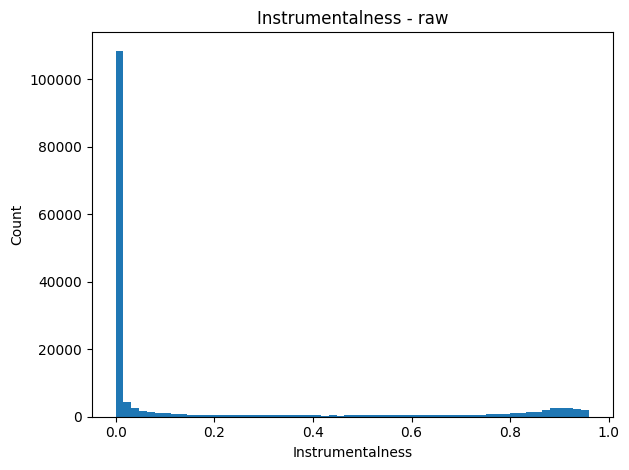

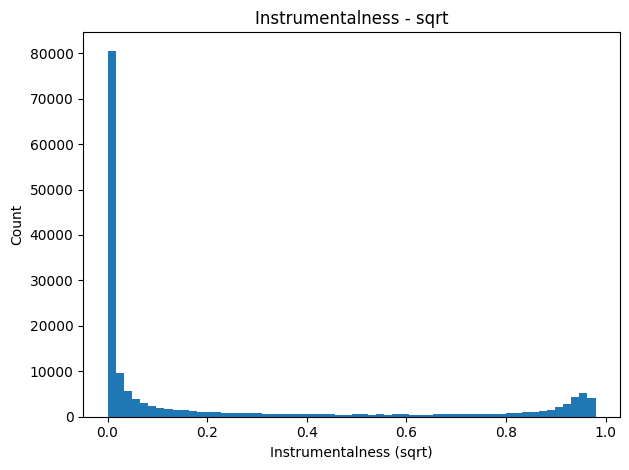

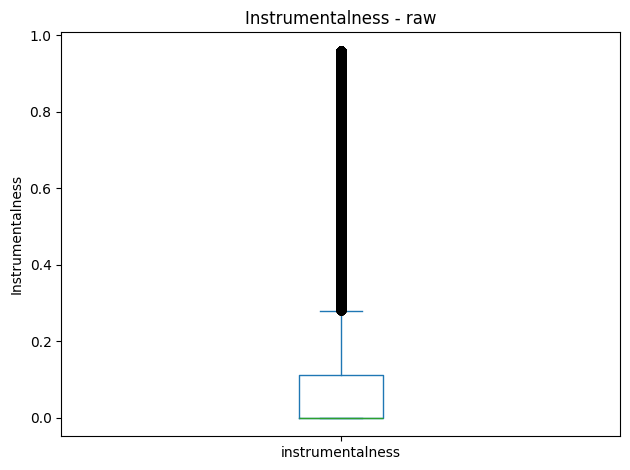

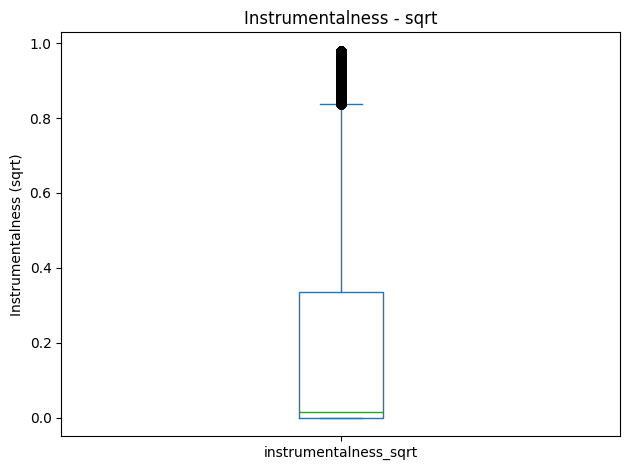

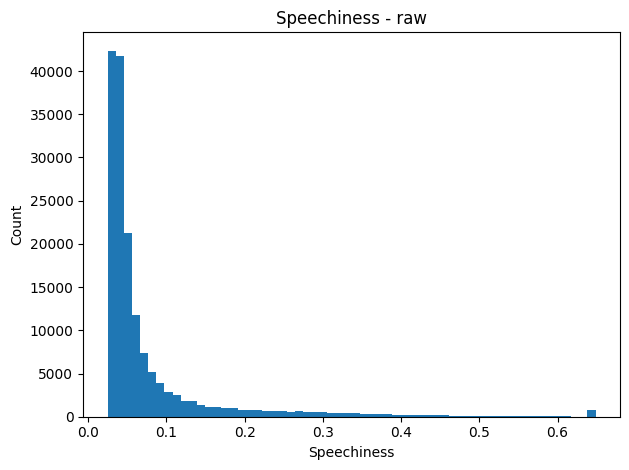

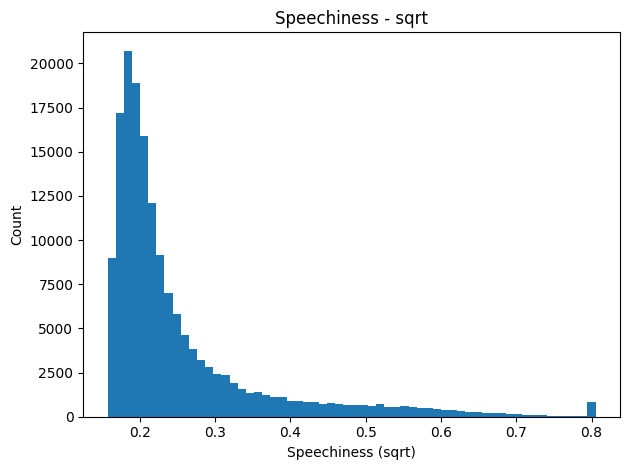

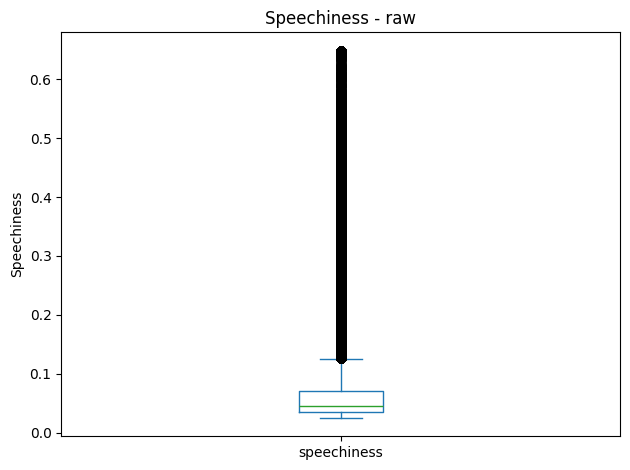

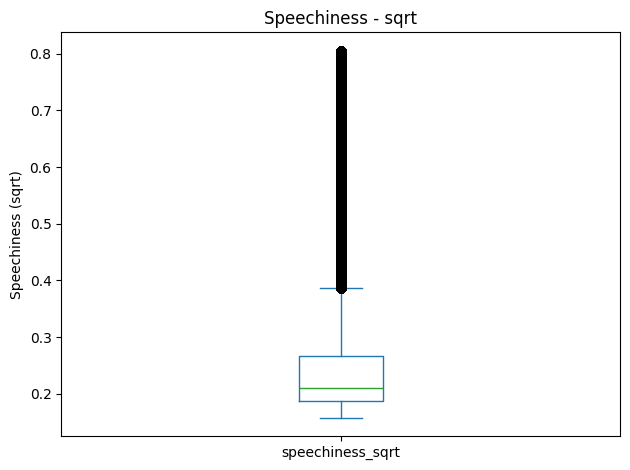

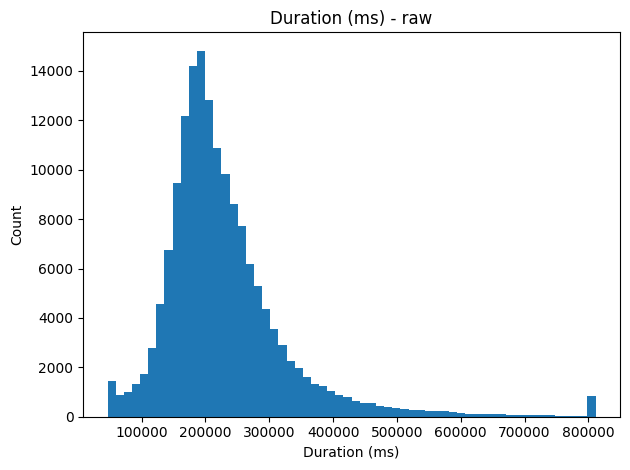

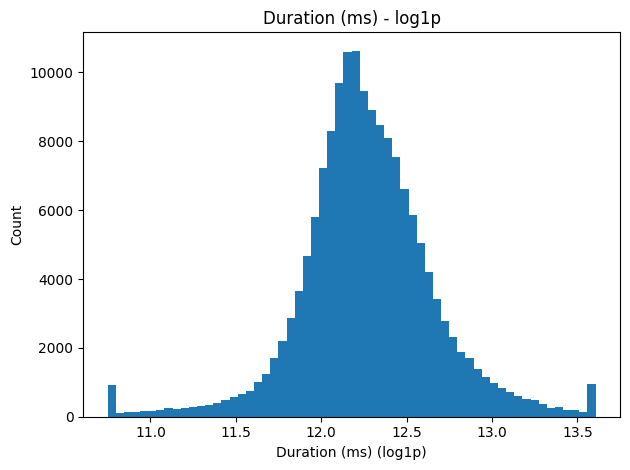

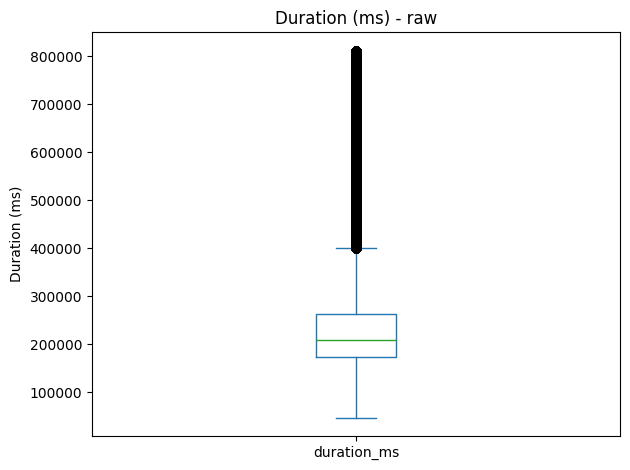

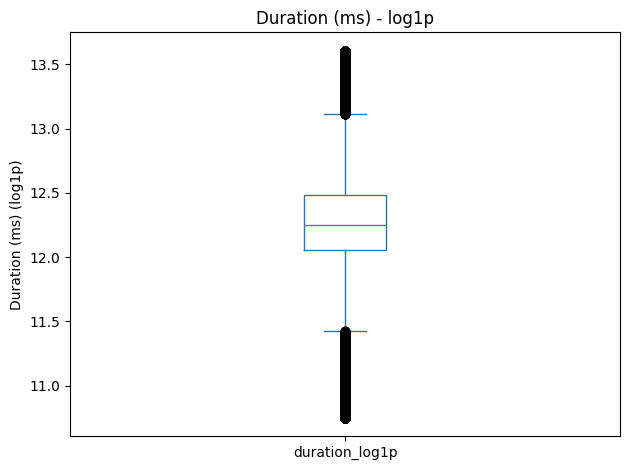

In [ ]:
if "instrumentalness" in df1.columns:
    df1["instrumentalness_zero"] = (df1["instrumentalness"] == 0).astype(int)
    df1["instrumentalness_sqrt"] = np.sqrt(df1["instrumentalness"])

if "speechiness" in df1.columns:
    df1["speechiness_sqrt"] = np.sqrt(df1["speechiness"])

if "duration_ms" in df1.columns:
    df1["duration_log1p"] = np.log1p(df1["duration_ms"])

# Visualizing the data
print(f"Rows before: {rows_before:,}")
print(f"Dropped non-music: {dropped_non_music:,}")
print(f"Rows after: {len(df1):,}")
print("Caps used (0.5% / 99.5%):")
for k, (lo, hi) in bounds.items():
    print(f"  {k}: [{lo:.4g}, {hi:.4g}]")

df_clean = df1


def plot_before_after(raw, transformed, name, trans_label):
    # Histogram - raw
    plt.figure()
    raw.dropna().plot(kind="hist", bins=60)
    plt.title(f"{name} - raw")
    plt.xlabel(name)
    plt.ylabel("Count")
    plt.tight_layout()

    # Histogram - transformed
    plt.figure()
    transformed.dropna().plot(kind="hist", bins=60)
    plt.title(f"{name} - {trans_label}")
    plt.xlabel(f"{name} ({trans_label})")
    plt.ylabel("Count")
    plt.tight_layout()

    # Boxplot - raw
    plt.figure()
    raw.dropna().plot(kind="box")
    plt.title(f"{name} - raw")
    plt.ylabel(name)
    plt.tight_layout()

    # Boxplot - transformed
    plt.figure()
    transformed.dropna().plot(kind="box")
    plt.title(f"{name} - {trans_label}")
    plt.ylabel(f"{name} ({trans_label})")
    plt.tight_layout()

    # Quick skew print
    print(f"{name} skew — raw: {raw.dropna().skew():.3f} | {trans_label}: {transformed.dropna().skew():.3f}")

# Instrumentalness: raw vs sqrt
if {"instrumentalness", "instrumentalness_sqrt"}.issubset(df1.columns):
    if "instrumentalness_zero" in df1.columns:
        pct_zero = 100 * df1["instrumentalness_zero"].mean()
        print(f"Instrumentalness exact zeros: {pct_zero:.1f}%")
    plot_before_after(
        df1["instrumentalness"],
        df1["instrumentalness_sqrt"],
        name="Instrumentalness",
        trans_label="sqrt"
    )

# Speechiness: raw vs sqrt
if {"speechiness", "speechiness_sqrt"}.issubset(df1.columns):
    plot_before_after(
        df1["speechiness"],
        df1["speechiness_sqrt"],
        name="Speechiness",
        trans_label="sqrt"
    )

# Duration: raw vs log1p
if {"duration_ms", "duration_log1p"}.issubset(df1.columns):
    plot_before_after(
        df1["duration_ms"],
        df1["duration_log1p"],
        name="Duration (ms)",
        trans_label="log1p"
    )

**Feature Engineering**

At this point, I think we are ready to build the final feature matrix.
* To ensure that train and test get the same treatment every time, I will wrap preprocessing into one pipeline.
* The numeric features live on very different scales and a few are skewed, so robust scaler makes them comparable while staying less sensitive to leftover outliers. key and mode are labels, not ordered values, so one hot encoding stops the model from assuming any order.
* Doing this with a column transformer also guards against leakage because the scaler and encoder are fit only on the training fold. It keeps cross-validation and later reuse simple, and it gives us a feature space where distances and model weights reflect signal, not unit size.

In [ ]:
num_cols = [
    "danceability", "energy", "valence", "acousticness",
    "liveness", "loudness", "tempo","instrumentalness_sqrt", "speechiness_sqrt", "duration_log1p","explicit"
]

cat_cols = ["key", "mode"]

# Building our transformer
pre = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("cat", OneHotEncoder(drop="if_binary", sparse_output=False), cat_cols),
    ],
    remainder="drop",
)
X = pre.fit_transform(df_clean)

# Visualising our DF for debugging purposes.
num_names = num_cols
cat_names = pre.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
feature_names = num_names + cat_names
X_df = pd.DataFrame(X, columns=feature_names, index=df_clean.index)

print("X shape:", X_df.shape)
X_df.head()

X shape: (161293, 24)


,danceability,energy,valence,acousticness,liveness,loudness,tempo,instrumentalness_sqrt,speechiness_sqrt,duration_log1p,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,-1.064257,-0.610360,-1.109425,0.579329,3.360759,-1.366358,-0.809791,2.750773,-0.241660,3.204507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.104418,-0.317568,0.967816,0.266517,0.164557,-0.290613,-1.285979,-0.049099,5.399366,-0.342099,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.867470,-0.711712,-1.155402,0.553053,-0.208861,-0.629146,-0.110781,2.806034,-0.331236,2.062428,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.080321,-0.389640,-0.866667,0.560561,1.563291,0.148539,-0.354132,-0.033373,-0.281049,0.014735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.506024,-0.650901,-0.664368,0.548048,0.601266,0.038926,-0.317118,-0.045226,-0.196513,-0.530341,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
